In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def create_fault_field(dip,x,y):
    v = np.zeros((len(x),len(y)))
    z = np.zeros((len(x),len(y)))

    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            v[i,j] = np.sin(np.deg2rad(dip))*(x[j]-np.min(x))+np.cos(np.deg2rad(dip))*(y[i]-np.min(y))
            z[i,j] = np.sin(np.deg2rad(-dip))*(x[j]-np.min(x))+np.cos(np.deg2rad(-dip))*(y[i]-np.min(y))
    return v,z

<ipython-input-3-6e030995af67>:48: UserWarning: No contour levels were found within the data range.
  ax[0][1].contour(x,y,r,levels=[0])
<ipython-input-3-6e030995af67>:49: UserWarning: No contour levels were found within the data range.
  ax[0][0].contour(x,y,r,levels=[0])
<ipython-input-3-6e030995af67>:99: UserWarning: No contour levels were found within the data range.
  ax[1][1].contour(x,y,r,levels=[0])
<ipython-input-3-6e030995af67>:100: UserWarning: No contour levels were found within the data range.
  ax[1][0].contour(x,y,r,levels=[0])


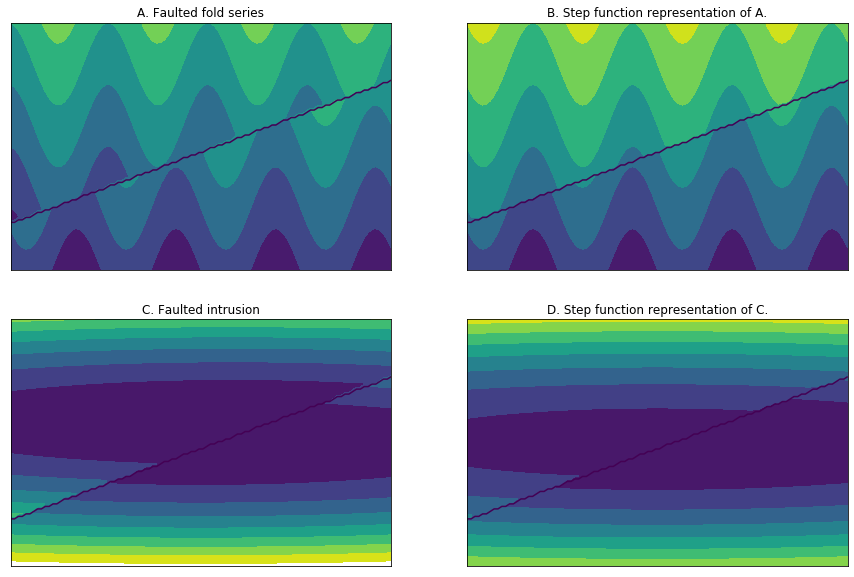

In [3]:
def fmt(x, y,Xflat,Yflat,Zflat):

    z = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(x)):
    # get closest point with known data
            dist = np.linalg.norm(np.vstack([Xflat - x[i,j], Yflat - y[i,j]]), axis=0)
            idx = np.argmin(dist)
            z[i,j] = Zflat[idx]
    return z

fault_loc=1
# plt.rcParams.update({'font.size': 18})
z = 0.2
throw = -0.5
dip = -30
fault_length = 1
fault_loc_y = 4.5
res = 100
boundary = 3
dip2 = 0
x = np.linspace(-boundary,boundary,res)
xx = np.linspace(-boundary,boundary,res)
y = np.linspace(-boundary,boundary,res)
fx,fz = create_fault_field(dip,x,y)
#v, vt= create_fault_field(dip2,x,y)
v = np.tile(y,(len(y),1))
v2 = np.tile(x,(len(x),1)).T

x = np.tile(x,(len(x),1))
y = x.T#np.tile(y,(len(y),1))
r = np.zeros(x.shape)
r2=np.zeros(fx.shape)
r[fx>fault_loc] = 1.0
newfx = fmt(x+x*-0.2,y+y*-0.2,x.flatten(),y.flatten(),fx.flatten())
#newfx.reshape((100,100))

r2[newfx>fault_loc] = 1.0

vfold = v2+np.sin(4*xx)
fig,ax = plt.subplots(2,2,figsize=(15,10))
fy_m = r*throw+v2
fx_m = r*throw + v
faulted_fold= fy_m+np.sin(4*fx_m)
c = ax[0][1].contourf(x,y,vfold+r)
c = ax[0][0].contourf(x,y,faulted_fold, levels=c.levels)
# ax[0][1].contourf(x,y,vfold+r,levels=c.levels)
ax[0][1].contour(x,y,r,levels=[0])
ax[0][0].contour(x,y,r,levels=[0])
ax[0][0].set_title("A. Faulted fold series")
ax[0][1].set_title("B. Step function representation of A.")
ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[0][0].set_yticks([])
ax[0][1].set_yticks([])


x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx,yy = np.meshgrid(x,y)
zz = (.2*xx)**2+yy**2
zz /= (np.max(zz)-np.min(zz))
zz*=3


fy_m = r*throw+v2
fx_m = r*throw + v
faulted_fold= (0.2*fx_m)**2+fy_m**2
# ax[0].contourf(x,y,faulted_fold)
# ax[1].contourf(x,y,zz+r*0.2)
# ax[1].contour(x,y,r,levels=[0])
# ax[0].contour(x,y,r,levels=[0])


# fy_m = r*throw+v2
# fx_m = r*throw + v
# faulted_fold= (0.2*fx_m)**2+fy_m**2

# x = np.linspace(-10,10,100)
# y = np.linspace(-10,10,100)

# xx,yy = np.meshgrid(x,y)
# zz = (.2*xx)**2+yy**2
# zz /= (np.max(zz)-np.min(zz))
# zz*=3
# # zz[xx>0]+=10
intrusion_step = zz+r*.20
intrusion_step -= np.min(intrusion_step)
intrusion_step /= np.linalg.norm(intrusion_step)

# faulted_fold = zz+r*.20
faulted_fold -= np.min(faulted_fold)
faulted_fold /= np.linalg.norm(faulted_fold)

c2 = ax[1][1].contourf(x,y,intrusion_step)
c = ax[1][0].contourf(x,y,faulted_fold,levels=c2.levels)

ax[1][1].contour(x,y,r,levels=[0])
ax[1][0].contour(x,y,r,levels=[0])
ax[1][0].set_title("C. Faulted intrusion")
ax[1][1].set_title("D. Step function representation of C.")
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
fig.savefig("step_function_problem.png", bbox_inches = 'tight',
    pad_inches = 0)